<a href="https://colab.research.google.com/github/MaCDM37/mlproject/blob/main/MovingAverageModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import os

In [7]:
df1 = yf.download(tickers=["HCLTECH.NS"],start="2023-01-01",end="2025-04-20")['Close']

[*********************100%***********************]  1 of 1 completed


In [8]:
df2 = pd.DataFrame()

In [10]:
df2.index = df1.index

In [12]:
df2['Close'] = df1['HCLTECH.NS']

In [15]:
df2['Returns'] = df2['Close'].pct_change()

In [17]:
df2['Returns'] = df2['Returns']*100

In [19]:
df2 = df2.iloc[1:]

In [20]:
from scipy.stats import chi2

In [21]:
from statsmodels.tsa.stattools import adfuller

In [28]:
sns.set()

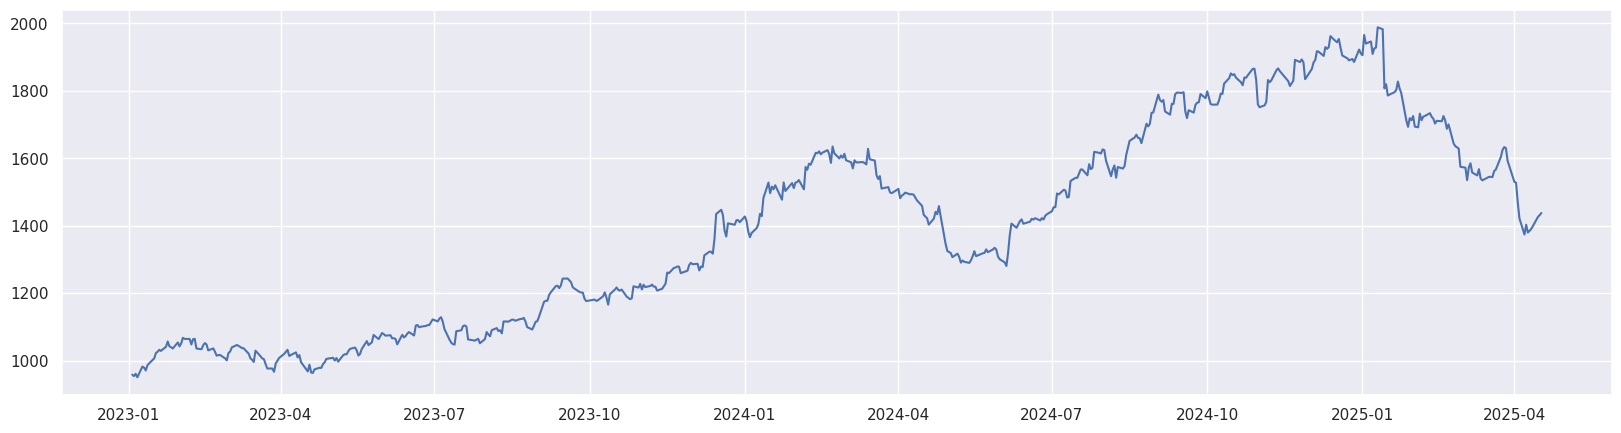

In [31]:
plt.figure(figsize=(20,5))
plt.plot(df2['Close'])
plt.show();

In [32]:
adfuller(df2['Returns'])

# while interpreting the returns we observe the following
# here the critical value is lower than the 1%, 5% and 10%
# also the p value is 0, < 0.05
# hence we can say from the adfuller test that the returns are significant, and it is stationary
# where there is constant mean, constant variance, and zero autocorrelation

(np.float64(-23.070323084632616),
 0.0,
 0,
 562,
 {'1%': np.float64(-3.442039359113542),
  '5%': np.float64(-2.8666965134862514),
  '10%': np.float64(-2.5695162601790758)},
 np.float64(1946.7310637187613))

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

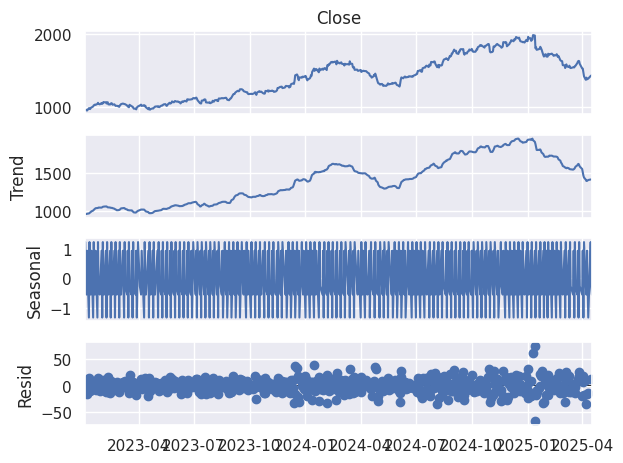

In [38]:
result = seasonal_decompose(df2['Close'],model='additive',period=5)
result.plot();

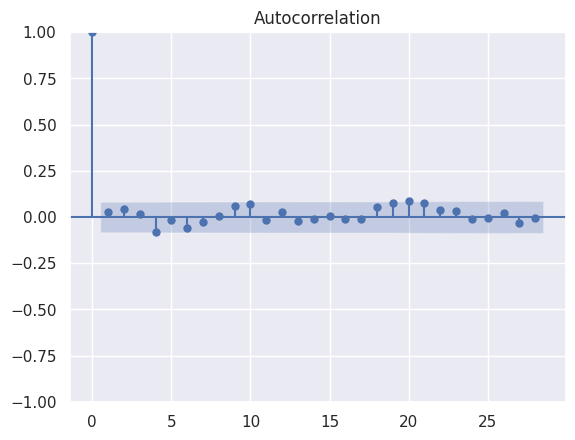

In [40]:
plot_acf(df2['Returns'])
plt.show();

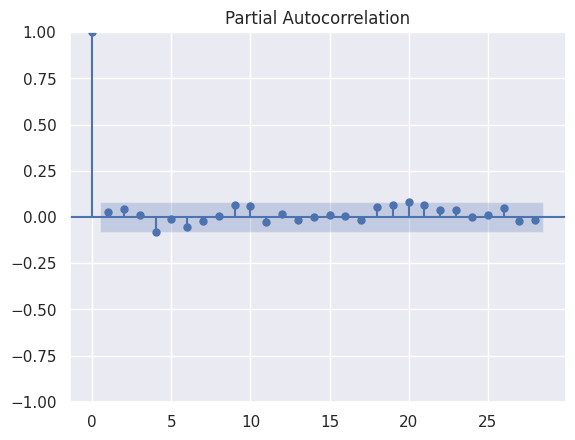

In [42]:
plot_pacf(df2['Returns'])
plt.show();

In [45]:
model_ret_ma1 = ARIMA(df2['Returns'],order=(0,0,1))
results_ret_ma1 = model_ret_ma1.fit()
print(results_ret_ma1.summary());

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  563
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1004.623
Date:                Sun, 20 Apr 2025   AIC                           2015.245
Time:                        07:57:49   BIC                           2028.245
Sample:                             0   HQIC                          2020.320
                                - 563                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0828      0.063      1.308      0.191      -0.041       0.207
ma.L1          0.0234      0.041      0.567      0.571      -0.057       0.104
sigma2         2.0770      0.078     26.530      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [47]:
model_ret_ma2 = ARIMA(df2['Returns'],order=(0,0,2))
results_ret_ma2 = model_ret_ma2.fit()
print(results_ret_ma2.summary());

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  563
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1004.052
Date:                Sun, 20 Apr 2025   AIC                           2016.104
Time:                        08:01:17   BIC                           2033.437
Sample:                             0   HQIC                          2022.871
                                - 563                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0828      0.066      1.250      0.211      -0.047       0.213
ma.L1          0.0225      0.042      0.543      0.587      -0.059       0.104
ma.L2          0.0487      0.042      1.170      0.2

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [48]:
!git config --global user.email "mayukh.dm242037@greatlakes.edu.in"
!git config --global user.name "MaCDM37"

In [53]:
!git clone https://github.com/MaCDM37/TS1_test.git

Cloning into 'TS1_test'...
fatal: could not read Username for 'https://github.com': No such device or address


In [52]:
!cp MovingAverageModel.ipynb TS1_test/

cp: cannot stat 'MovingAverageModel.ipynb': No such file or directory
